# Data Hub Shapes

The shapes in the Data Hub can be organized hirarchical, so you need to prepare your input shapes accordingly. The format is as follows:

In [3]:
#!python --version
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install matplotlib

import pandas as pd
import geopandas
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.0.2/libexec/bin/python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.0.2/libexec/bin/python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.0.2/libexec/bin/python3.11 -m pip install --upgrade pip


In [4]:
# Example of required structure for import of Shapes into Data Hub
pd.DataFrame([{
    'id': 1,
    'name': 'Canada',
    'type': 'country',
    'parent_id': None,
    'geometry': '...'
},
{
    'id': 2,
    'name': 'Alberta',
    'type': 'province',
    'parent_id': 1,
    'geometry': '...',
},
{
    'id': 3,
    'name': 'British Columbia',
    'type': 'province',
    'parent_id': 1,
    'geometry': '...',
},
{
    'id': 4,
    'name': 'Elk Island NP',
    'type': 'conservation_area',
    'parent_id': 2,
    'geometry': '...'
},
{
    'id': 5,
    'name': 'Banff NP',
    'type': 'conservation_area',
    'parent_id': 3,
    'geometry': '...'
}])

,id,name,type,parent_id,geometry
0,1,Canada,country,NaN,...
1,2,Alberta,province,1.0,...
2,3,British Columbia,province,1.0,...
3,4,Elk Island NP,conservation_area,2.0,...
4,5,Banff NP,conservation_area,3.0,...


# Example preparation of Admin level 0, 1 and 2

See Shape-File download: https://gadm.org/download_country.html

In [5]:
gdf0 = geopandas.read_file('../input/shapes/Canada/canada.shp')
gdf1 = geopandas.read_file('../input/shapes/Canada_provinces/canada_provinces.shp')
gdf2 = geopandas.read_file('..//input/shapes/Canada_nationalparks/canada_nationalparks.shp')

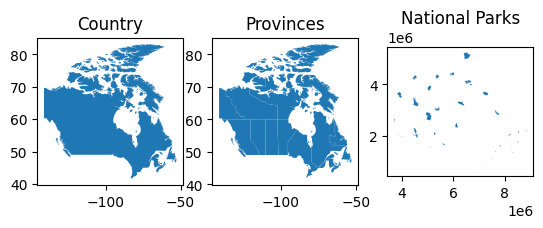

In [6]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
gdf0.plot(ax=ax0)
gdf1.plot(ax=ax1)
gdf2.plot(ax=ax2)

ax0.set_title('Country')
ax1.set_title('Provinces')
ax2.set_title('National Parks')

plt.show()

# Prepare level0

In [7]:
gdf0

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,CAN,Member State,CAN,Canada,Americas,Northern America,CA,Canada,"MULTIPOLYGON (((-66.87528 44.61944, -66.88612 ..."


In [8]:
gdf0_new = geopandas.GeoDataFrame([{
    'name': 'Canada',
    'geometry': gdf0.at[0, 'geometry']
}])

In [9]:
# Rename
gdf0_new = geopandas.GeoDataFrame([{
    'name': 'Canada',
    'type': 'country',
    'parent_name': pd.NA,
    'properties': pd.NA,
    'geometry': gdf0.at[0, 'geometry']
}]).set_crs(gdf0.crs)

In [10]:
gdf0_new

,name,type,parent_name,properties,geometry
0,Canada,country,<NA>,<NA>,"MULTIPOLYGON (((-66.87528 44.61944, -66.88612 ..."


# Prepare level1

In [11]:
gdf1.head(3)

,year,prov_code,prov_name_e,prov_area_c,prov_type,prov_name_f,geometry
0,2021,['46'],['Manitoba'],CAN,province,Manitoba,"POLYGON ((-94.82808 60.00000, -94.85275 59.971..."
1,2021,['12'],['Nova Scotia'],CAN,province,Nouvelle-Ãcosse,"MULTIPOLYGON (((-65.60612 43.51377, -65.55855 ..."
2,2021,['59'],['British Columbia'],CAN,province,Colombie-Britannique,"MULTIPOLYGON (((-124.68935 49.54964, -124.6251..."


In [12]:
# Clean table entries
def clean_name(name):
    name = name.replace("['", '')
    name = name.replace("']", '')
    return name

gdf1['prov_name_e'] = gdf1['prov_name_e'].apply(clean_name)


# Remove uneeded columns
gdf1_new = gdf1[['prov_name_e','geometry']]

# Rename
gdf1_new = gdf1_new.rename(columns={
    'prov_name_e': 'name' 
})


gdf1_new = gdf1_new.sort_values('name', ascending=True)


# Add type columns
gdf1_new['type'] = 'province'
gdf1_new['parent_name'] = 'Canada'

In [13]:
gdf1_new.head(3)

,name,geometry,type,parent_name
11,Alberta,"POLYGON ((-110.00502 48.99970, -110.44096 48.9...",province,Canada
2,British Columbia,"MULTIPOLYGON (((-124.68935 49.54964, -124.6251...",province,Canada
0,Manitoba,"POLYGON ((-94.82808 60.00000, -94.85275 59.971...",province,Canada


# Prepare level2

In [14]:
gdf2.head(3)

,adminAreaI,adminAreaN,adminAre_1,adminAre_2,distributi,distribu_1,absoluteAc,absolute_1,adminRegio,adminReg_1,jurisdicti,jurisdic_1,NID,representa,represen_1,webReferen,OBJECTID,geometry
0,QUTT,QUTTINIRPAAQ NATIONAL PARK OF CANADA,NaN,NaN,NP,National Park of Canada,>100m,Greater than 100 metres,NU,Nunavut Region,NU,Nunavut,8ff52e70ba3611d892e2,legal,Legal,https://clss.nrcan-rncan.gc.ca/data-donnees/sg...,1,"POLYGON ((6527800.999 5068010.602, 6545320.906..."
1,KLUR,KLUANE NATIONAL PARK RESERVE OF CANADA,NaN,NaN,NPR,National Park Reserve of Canada,>100m,Greater than 100 metres,YROC_YT,Yukon Region,YT,Yukon,e1f50567b25a4c9984cb,legal,Legal,https://clss.nrcan-rncan.gc.ca/data-donnees/sg...,189,"POLYGON ((3954434.611 3648984.441, 3954435.198..."
2,WAPU,WAPUSK NATIONAL PARK OF CANADA,NaN,NaN,NP,National Park of Canada,>100m,Greater than 100 metres,MB,Manitoba Region,MB,Manitoba,3f5e9b39ba3411d892e2,legal,Legal,https://clss.nrcan-rncan.gc.ca/data-donnees/sg...,313,"POLYGON ((6122537.248 2503949.810, 6122828.331..."


In [15]:
# Remove uneeded columns
gdf2_new = gdf2[['adminAreaN', 'jurisdic_1', 'geometry']]

# Rename
gdf2_new = gdf2_new.rename(columns={
    'adminAreaN': 'name', 
    'jurisdic_1': 'parent_name'
})

gdf2_new = gdf2_new.sort_values('name', ascending=True)

# Add type columns
gdf2_new['type'] = 'conservation_area'

In [16]:
gdf2_new.head(3)

,name,parent_name,geometry,type
22,AULAVIK NATIONAL PARK OF CANADA,Northwest Territories,"POLYGON ((5387049.061 4366630.300, 5387049.080...",conservation_area
33,AUYUITTUQ NATIONAL PARK OF CANADA,Nunavut,"POLYGON ((7280058.168 3575348.102, 7279344.905...",conservation_area
5,BANFF NATIONAL PARK OF CANADA,Alberta,"POLYGON ((4536055.121 2125839.065, 4536057.772...",conservation_area


In [17]:
# default CRS is 4326 in ESIDA, other CRS will lead to an error 
gdf012 = pd.concat([gdf0_new.to_crs(4326), gdf1_new.to_crs(4326), gdf2_new.to_crs(4326)]).reset_index(drop=True)
gdf012.insert(0, 'id', range(1, len(gdf012)+1))

In [18]:
def get_id_for_name(name):
    dfx = gdf012[gdf012['name'] == name].reset_index(drop=True)
    
    if (len(dfx) == 0):
        return None
    return dfx.at[0, 'id']

gdf012['parent_id'] = gdf012['parent_name'].apply(get_id_for_name)

In [19]:
gdf012_final = gdf012.drop(columns=['parent_name'])

In [20]:
gdf012_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          60 non-null     int64   
 1   name        60 non-null     object  
 2   type        60 non-null     object  
 3   properties  0 non-null      object  
 4   geometry    60 non-null     geometry
 5   parent_id   57 non-null     float64 
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 2.9+ KB


In [21]:
gdf012_final.head(10)

,id,name,type,properties,geometry,parent_id
0,1,Canada,country,NaN,"MULTIPOLYGON (((-66.87528 44.61944, -66.88612 ...",NaN
1,2,Alberta,province,NaN,"POLYGON ((-110.00502 48.99970, -110.44096 48.9...",1.0
2,3,British Columbia,province,NaN,"MULTIPOLYGON (((-124.68935 49.54964, -124.6251...",1.0
3,4,Manitoba,province,NaN,"POLYGON ((-94.82808 60.00000, -94.85275 59.971...",1.0
4,5,New Brunswick,province,NaN,"MULTIPOLYGON (((-66.93908 45.02470, -66.95651 ...",1.0
5,6,Newfoundland and Labrador,province,NaN,"MULTIPOLYGON (((-53.63678 48.87151, -53.72101 ...",1.0
6,7,Northwest Territories,province,NaN,"MULTIPOLYGON (((-109.83296 75.93393, -109.8323...",1.0
7,8,Nova Scotia,province,NaN,"MULTIPOLYGON (((-65.60612 43.51377, -65.55855 ...",1.0
8,9,Nunavut,province,NaN,"MULTIPOLYGON (((-106.67059 73.67679, -106.4866...",1.0
9,10,Ontario,province,NaN,"MULTIPOLYGON (((-79.91454 44.99301, -80.00895 ...",1.0


In [23]:
gdf012_final.to_file('../input/shapes/Canada_overview.gpkg', index=False)